# Analyzing Vehicles Sales

Analysis of advertisements for vehicles published on an online board, the main goal is to determine which factors influence the price of a vehicle the most.

This project explains how to do simple Exploratory Data Analysis(EDA) in Python and contains:

1. Graphs
2. Pivot Tables
3. Data Slices
4. Work with Several Data Sources
5. Combining Columns

## Opening the data file and looking at the general information

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

data = pd.read_csv("C:\\Users\\Shir\\Downloads\\Practicum\\Library\\vehicles_us.csv")
print(data.info())
print('-----------------------------------------------------------------------')
print(data.head(5))
print('-----------------------------------------------------------------------')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
-----------------------------------------------------------------------
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          

### Conclusion

The data contains 51525 rows and 13 columns

Some fields require more attention:

1. is_4wd - Boolean field, many missing values.
2. paint_color - missing values.
3. odometer - missing values.
4. model_year - 3619 missing values.
5. model - contains duplicates.
6. cylinders - missing values.




In [3]:
# Print the number of missing values per column
print(data.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [4]:
#check for duplicates and errors
print(data.nunique())

price            3443
model_year         68
model             100
condition           6
cylinders           7
fuel                5
odometer        17762
transmission        3
type               13
paint_color        12
is_4wd              1
date_posted       354
days_listed       227
dtype: int64


In [5]:
#explore paint_color column
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [6]:
#explore type column
data['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [7]:
#explore model column
data['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

It seems like the model column has duplicates

## Data preprocessing

In [7]:
#1. Replacing missing values in is_4wd column with 0, this ia a Boolean field conatins only "1", it's reasonable to assume that the missing values are '0'
data['is_4wd'] = data['is_4wd'].fillna(value= 0)

In [8]:
#2. Replacing missing values in paint_color column with 'Other', as we can't determine the color of the car
data['paint_color'] = data['paint_color'].fillna(value= 'Other')

In [8]:
#3. Check what is the most common years by model

year_group = data.groupby('model')['model_year'].agg(lambda s: s.mode()[0])

#Filling the missing values in the model_year column: 

def year(row):
    year = row['model_year']
    if pd.isnull(year):
        return year_group[row['model']]
    else:
        return row['model_year']
data['model_year'] = data.apply(year,axis=1)
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2013.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [9]:
#4. Replacing missing values in odometer column with the median
odometer_median = data['odometer'].median()
data['odometer'] = data['odometer'].fillna(value= odometer_median)

In [10]:
#5. Filling the missing values in the cylindars column:
cylinders_median = data['cylinders'].median()
data['cylinders'] = data['cylinders'].fillna(value= cylinders_median)

## Make calculations and add them to the table

In [12]:
#1. condition column - converting string values to a numeric scale:
data.replace({'new': '5', 'like new': '4', 'excellent': '3', 'good': '2', 'fair': '1', 'salvage': '0'}, inplace = True)
data["condition"] = pd.to_numeric(data["condition"])
data['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

In [13]:
#2. converting the 'date_posted' column to datetime format
data['date_posted']= pd.to_datetime(data['date_posted'])
#creating new columns for day of the week, month and year
data['Day'] = data['date_posted'].dt.weekday
data['Month'] = data['date_posted'].dt.month
data['Year'] = data['date_posted'].dt.year


In [14]:
#3. Adding a column that represents the vehicle's age (in years) when the ad was placed
data['age'] = ( data['Year'] - data['model_year']) +1


In [15]:
#4. Adding a column that represents the vehicle's average mileage per year
data['avg_mileage'] = data['odometer']/data['age']

In [16]:
#5. convert 'cylinders' into an integer
data["cylinders"] = data["cylinders"].astype('int')

In [17]:
#6. convert model_year and odometer to int
data["model_year"] = data["model_year"].astype('int')
data["odometer"] = data["odometer"].astype('int')
data["is_4wd"] = data["is_4wd"].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  Day           51525 non-null  int64         
 14  Month         51525 non-null  int64         
 15  Year          51525 non-null  int64 

## Exploratory Data Analysis

Text(0.5, 0, 'Condition')

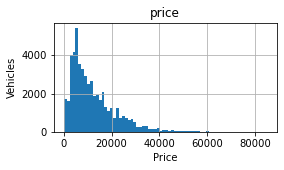

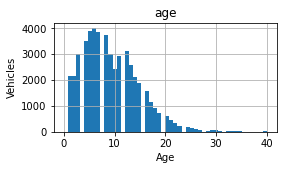

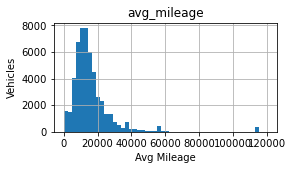

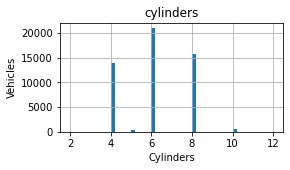

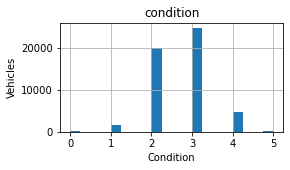

In [18]:
#Histograms for price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition

price_hist = data.hist('price', bins=70, range=(0, 85000),figsize=(4, 2))
plt.ylabel("Vehicles")
plt.xlabel("Price")
age_hist = data.hist('age', bins=50, range=(0, 40),figsize=(4, 2))
plt.ylabel("Vehicles")
plt.xlabel("Age")
avg_mileage_hist = data.hist('avg_mileage', bins=50, range=(0, 120000),figsize=(4, 2))
plt.ylabel("Vehicles")
plt.xlabel("Avg Mileage")
cylinders_hist = data.hist('cylinders', bins=50, range=(2, 12),figsize=(4, 2))
plt.ylabel("Vehicles")
plt.xlabel("Cylinders")
condition_hist = data.hist('condition', bins=20, range=(0, 5),figsize=(4, 2))
plt.ylabel("Vehicles")
plt.xlabel("Condition")

There are outliers that should be ignored:
1. price column - small values under 100 - not representing the real picture, and large values above 60,000, there are almost no values in that range.
2. age column - values above 35 are not really relevant for the analysis.
3. average mileage column - values above 65,000 seems like outliers, and will be ignored.
4. cylinders column - it seems like the majority of the vehicles has 4,6 and 8 cylinders, other vales are insignificant. 
5. condition column - seems like a normal distribution

### removing outliers

In [19]:
#removing the outliers, and storing the filtered data in a new table
data_new = data.query('price >= 100 and price <= 50000')
data_new = data_new.query('age <= 35')
data_new = data_new.query('avg_mileage <= 80000')
data_new = data_new[(data_new['cylinders'] == 4) | (data_new['cylinders'] == 6)| (data_new['cylinders'] == 8)]
data_new.describe()

,price,model_year,condition,cylinders,odometer,days_listed,Day,Month,Year,age,avg_mileage
count,49314.000000,49314.000000,49314.000000,49314.000000,49314.000000,49314.000000,49314.000000,49314.000000,49314.000000,49314.000000,49314.000000
mean,12005.027700,2009.880196,2.628442,6.065904,116511.543659,39.556718,3.002129,6.621629,2018.308168,9.427972,15146.054734
std,8911.863022,5.502952,0.711259,1.529370,58167.121145,28.205189,1.995832,3.473528,0.461741,5.514784,9265.613242
min,105.000000,1984.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000
25%,5200.000000,2006.000000,2.000000,4.000000,81662.000000,19.000000,1.000000,3.000000,2018.000000,5.000000,9416.666667
50%,9250.000000,2011.000000,3.000000,6.000000,113000.000000,33.000000,3.000000,7.000000,2018.000000,8.000000,13229.083333
75%,16500.000000,2014.000000,3.000000,8.000000,148226.500000,53.000000,5.000000,10.000000,2019.000000,13.000000,18594.750000
max,50000.000000,2019.000000,5.000000,8.000000,710000.000000,271.000000,6.000000,12.000000,2019.000000,35.000000,80000.000000


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

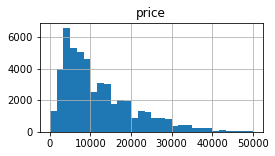

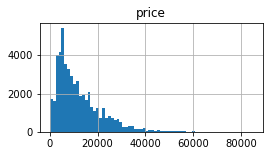

In [20]:
data_new.hist('price', bins=30, range=(0, 50000),figsize=(4, 2))
data.hist('price', bins=70, range=(0, 85000),figsize=(4, 2))

Conclusion: right-skewed distribution, the peak of the histogram is between 0 and 10,000, and the median is 8995. There are not many cars with very high price, while the average price is 11464.
The trend is more clear in the new histogram.

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

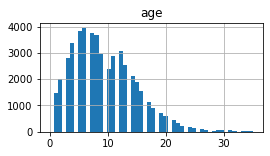

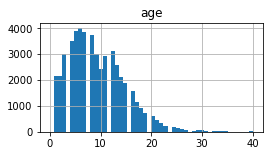

In [21]:
data_new.hist('age', bins=50, range=(0, 35),figsize=(4, 2))
data.hist('age', bins=50, range=(0, 40),figsize=(4, 2))

Conclusion: right-skewed distribution, the peak of the histogram is between 0 and 10, and the median is 7. There are not many old cars, most of the cars are under 10 years ols, the average age is 8.7.
The trend is more clear in the new histogram.

array([[<AxesSubplot:title={'center':'avg_mileage'}>]], dtype=object)

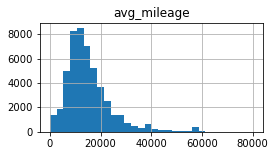

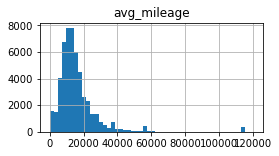

In [22]:
data_new.hist('avg_mileage', bins=30, range=(0, 80000),figsize=(4, 2))
data.hist('avg_mileage', bins=50, range=(0, 120000),figsize=(4, 2))

Conclusion: right-skewed distribution, the peak of the histogram is between 0 and 20,000, and the median is 15152. There are not many cars with very high mileage, while the average price is 17618. The trend is more clear in the new histogram.

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

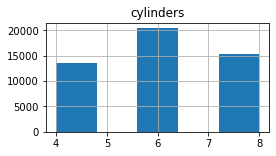

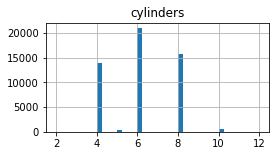

In [23]:
data_new.hist('cylinders', bins=5, range=(4, 8),figsize=(4, 2))
data.hist('cylinders', bins=40, range=(2, 12),figsize=(4, 2))

Conclusion: we have 3 main values, meaning most of the cars has 4,6,or 8 cylinders.
The new hisogram show that the most frequent value is 8 while the average number of cylinders is 6.

array([[<AxesSubplot:title={'center':'condition'}>]], dtype=object)

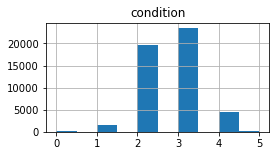

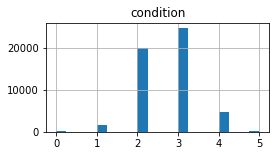

In [24]:
data_new.hist('condition', bins=10, range=(0, 5),figsize=(4, 2))
data.hist('condition', bins=20, range=(0, 5),figsize=(4, 2))

Conclusion: left-skewed distribution, the peak of the histogram is 3 (excellent), while the average is slightly lower(2.6), 
meaning that most of the cars are either in a good or excellent condition.
It's logical, we would expect that most of the cars will be in medium condition, and there won't be a lot of cars in salvage or new condition.

10.0
77.0


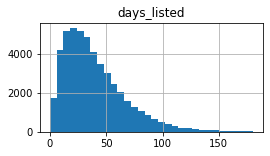

In [25]:
data_new.hist('days_listed', bins=30, range=(0, 180),figsize=(4, 2))
data_new.describe()
print(data_new['days_listed'].quantile(0.1))
print(data_new['days_listed'].quantile(0.9))

Advertisements were displayed on average 39.6 days, and the median is 33.
10% of the ads were removed in the first 10 days, 90% of the ads were removed in the first 77 days.


SUV            12015
sedan          11706
truck          11608
pickup          6744
coupe           2071
wagon           1533
mini-van        1149
hatchback       1024
van              603
convertible      392
other            249
offroad          209
bus               11
Name: type, dtype: int64

Top 2: 
 SUV      12015
sedan    11706
Name: type, dtype: int64


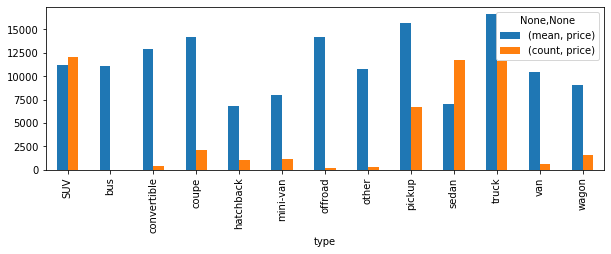

In [26]:
#Analyze of the number of ads and the average price for each type of vehicle.
data_price_type = data_new.pivot_table(index='type',values = 'price', aggfunc=['mean', 'count'])
data_price_type.plot(figsize=(10, 3), kind='bar')

#Selecting the two types with the greatest number of ads
print(data_new['type'].value_counts())
print("")
print('Top 2: \n',data_new['type'].value_counts().head(2))

In [27]:
#check the correlation between price and age,mileage and condition:
print('Correlation:')
print('price and age:', data_new['price'].corr(data_new['age']))
print('price and avg_mileage:',data_new['price'].corr(data_new['avg_mileage']))
print('price and condition:',data_new['price'].corr(data_new['condition']))
print('price and transmission:',data_new['price'].corr(data_new['transmission'].astype('category').cat.codes))
print('price and Color:',data_new['price'].corr(data_new['paint_color'].astype('category').cat.codes))



Correlation:
price and age: -0.5438644361141516
price and avg_mileage: 0.21142896169481276
price and condition: 0.2422259701272988
price and transmission: 0.10484117798254844
price and Color: 0.012406555155039382


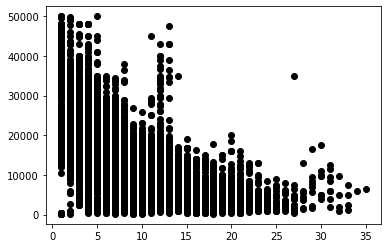

In [29]:

#new data frames for the popular types:
data_new_SUV =  data_new[data_new['type'] == 'SUV']
data_new_sedan = data_new[data_new['type'] == 'sedan']

#

x_SUV = data_new_SUV['age']
y_SUV = data_new_SUV['price']

print(plt.plot(x_SUV, y_SUV, 'o', color='black'))

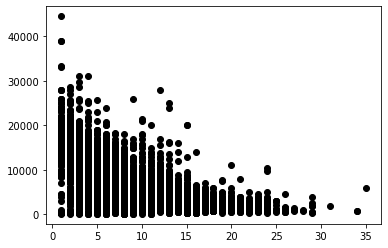

In [30]:
x_sedan = data_new_sedan['age']
y_sedan = data_new_sedan['price']

print(plt.plot(x_sedan, y_sedan, 'o', color='black'))

Conclusion: new cars have higher price than old cars

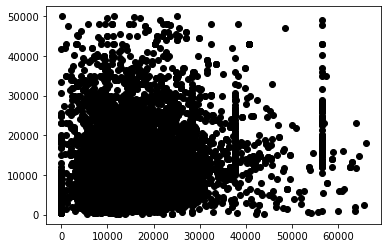

In [31]:
x = data_new_SUV['avg_mileage']
y = data_new_SUV['price']

plt.plot(x, y, 'o', color='black');

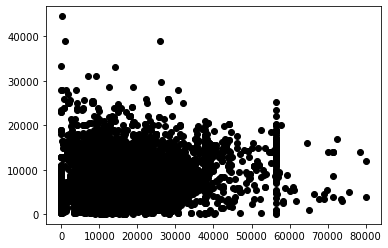

In [32]:
x = data_new_sedan['avg_mileage']
y = data_new_sedan['price']

plt.plot(x, y, 'o', color='black');

Conclusion: there is a price limit for cars with high mileage. Most of the ads are cars with low mileage and low price.

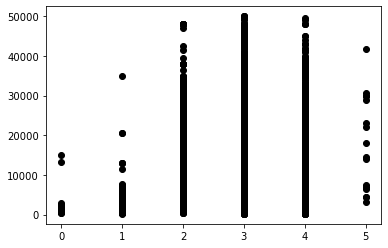

In [33]:
x = data_new_SUV['condition']
y = data_new_SUV['price']

plt.plot(x, y, 'o', color='black');

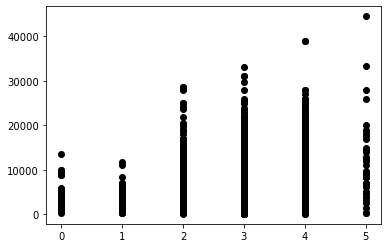

In [34]:
x = data_new_sedan['condition']
y = data_new_sedan['price']

plt.plot(x, y, 'o', color='black');

Conclusion: cars with good, excellent and like new condition has the highest price, we would expect cars with new condition to have the highest price, but this is not the case.

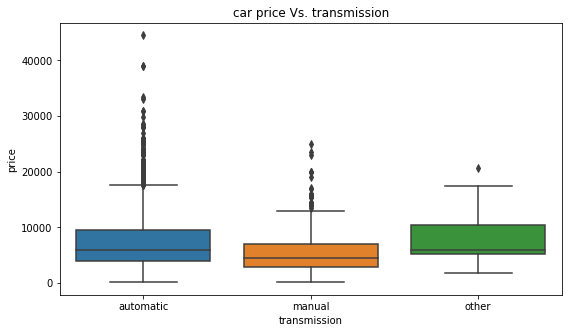

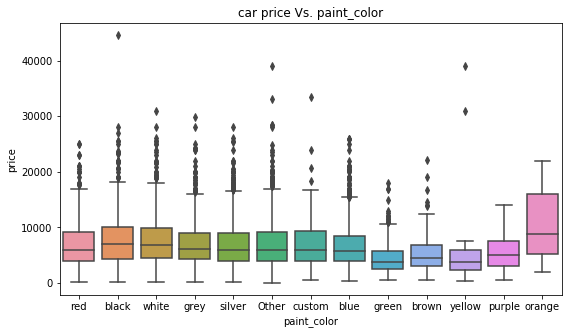

In [57]:
import seaborn as sns

# price Vs transmission type:
plt.figure(figsize=(9,5))
sns.boxplot(x=data_new_sedan.transmission, y=data_new_sedan.price)
plt.title('car price Vs. transmission');

# price Vs paint_color type:
plt.figure(figsize=(9,5))
sns.boxplot(x=data_new_sedan.paint_color, y=data_new_sedan.price)
plt.title('car price Vs. paint_color');

Conclusion: for sedan, the price of automatic cars is much higher than manual cars. For SUV's manual is higher than automatic.
For both types, 'Other' has the highest prices on average.

Text(0.5, 1.0, 'car price Vs. paint_color')

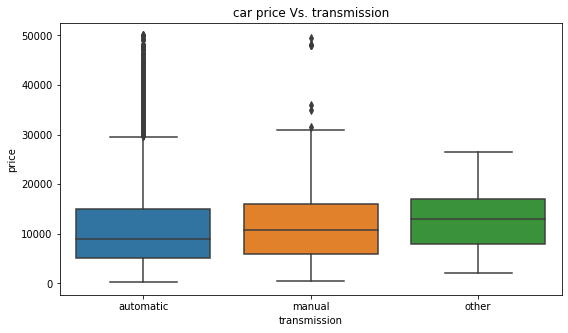

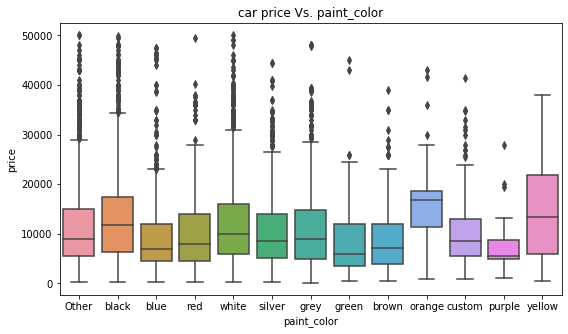

In [50]:
# price Vs transmission type:
plt.figure(figsize=(9,5))
sns.boxplot(x=data_new_SUV.transmission, y=data_new_SUV.price)
plt.title('car price Vs. transmission')

plt.figure(figsize=(9,5))
sns.boxplot(x=data_new_SUV.paint_color, y=data_new_SUV.price)
plt.title('car price Vs. paint_color')

Conclusion: it seems that the price of orange cars is higher than the rest of the colors. The price of black and white cars are also high.
In SUV's we also see that the price of yellow color is also high.

## Overall conclusion

The data was imported and examined, the file contains 51525 ads for vehicles with 13 different parameters. Data preprocessing was made by filling in missing values: 
Missing values in the is_4wd column were filled by 0.
Missing values in the paint_color column were filled by 'other'.
Missing values in the odometer and cylindars column were filled with the nedian value.
Missing values in the model_year column were filled by the most common value for each year. 

Data were categorized, conditionm, model_year, cylinders and odometer columns were converted to a numeric scale, is_4wd converted to bool. date_posted column was converted to DateTime format and columns for vehicle's age (in years) and vehicle's average mileage per year were added. Outliers that might interfere with the analysis were removed and the clean data was saved for later analysis.

Exploratory data analysis was made by analyzing the number of ads and the average price for each type of vehicle, two types with the greatest number of ads were selected for further analysis(SUV and Sedan).
Scatterplots, and box plots for categorical variables were added.

Main findings:

Analysis showed a positive correlation between price and the Condition, and Mileage. Meaning these variables has the most impact on the price. Transmission and color also showed positive correlation.

New cars have a higher price than old cars while there is a price limit for cars with high mileage. Most of the ads are for cars with low mileage and low price.
Cars with good, excellent and like-new conditions have the highest price, we would expect cars with the new condition to have the highest price, but this is not the case. One of the reasons for that might be that the number of ads with the new conditions is very small.
The price of black and white cars is higher than the rst of the colors, meaning these colors are more popular.
Orange and yellow colors can also affect the price of the car.
For sedan, the price of automatic cars is much higher than manual cars, for SUV's manual is higher than automatic.
For both types, 'Other' has the highest prices on average.